In [1]:
# goal: learn about some population
    
#     - so we have our population, and take a sample of it to calculate statistics (sample mean, sample std, etc) to then
#     conduct inference on parameters (population mean, population std, etc) 
#     we can then use that parameter to learn about the population
    
#     - measurement on a population is a parameter
#     - measurement on a sample is called a statistic

In [2]:
# frequentists: interpret probability based on long term behavior 
#         times something happens/#number of trials

In [3]:
# bayesian: degrees of belief - how likely we believe this event to occur

In [4]:
# 'long-run behavior' doesn't always make sense'
# bayesian stats feels more subjective (degrees of belief) - data science is full of subjective decisions

# bayesian inference allows us to incorporate our data and prior knowledge

In [5]:
# frequentis treat the the population mean as fixed while bayesian stats treat it as a parameter with a distribution (ie mu ~ N(64, 2))

In [6]:
# # frequentists use:
#     confidence intervals, hypothesis testing, 95%. (a,b)
#     i am 95% confident that the population parameter is between a and b

# Bayesian-  

# credible interval: there is a 95% chance that the population parameter is between a and b

In [7]:
# frequentist stats: p-value
#     p-value = P(Z >= z assuming our null hypothesis is true (where Z is a random variable and z is the z-score from current experiment)
                
# Frequentist goal:  gives us the probability that this would be our data given that our hypothsis is true

In [8]:
# goal (Bayes): what is the probability that our hypothesis is true given our data

In [9]:
# distribution: the set of all possible values of a variable and how likely it is to observe each value

In [10]:
# theta is the parameter we want to learn about
# y is our data

In [11]:
# the posterior distribution is f of theta given y and represents all possible values of theta and how frequently we observe each of these values, given the data we've observed'

In [12]:
# f of theta - the prior distribution of theta (prior is before looking at data
#                                              f of y given theta is the likelihood of observing data y under some modelb)

In [13]:
# our posterior is =  our prior * our likelihood

In [14]:
# frequentism has a prior that is just a uniform distribution from negative to positive infitiy - its entirely flat and has zero influence on our model

In [15]:
# we can't always get a nice form for the posterior distribution

## Lesson: Bayesian Inference

> Author: Matt Brems

Suppose I want to use your biological parents' heights to predict your height as an adult.
- $Y$: your height.
- $X$: the average of your biological parents' heights.

I want to fit a simple linear regression model $Y = \beta_0 + \beta_1X$. Let's try to infer reasonable values of $\beta_1$.

In frequentist inference, we let the data speak for itself.
- If fitting a simple linear regression model $Y = \beta_0 + \beta_1X$, our "prior knowledge" about $\beta_1$ is that $\beta_1$ equally likely to be anywhere between $-\infty$ and $+\infty$. (In effect, there is **no prior knowledge**.)

In Bayesian inference, we allow ourselves to include prior knowledge in the decision-making process.
- If fitting a simple linear regression model $Y = \beta_0 + \beta_1X$, maybe we believe that $\beta_1$ can reasonably only be between 0.8 and 1.2. We could select a Uniform(0.8, 1.2) prior or a Normal(1.0, 0.1) prior.

### Why Bayes?
- We can easily estimate $P(\text{hypothesis}|\text{data})$, which is what we want to learn about!
- Just like scientific reasoning and research builds on previous research, **we can use our understanding of the world around us to better inform our inference** rather than to pretend like we need to start from scratch every time!
- Every modeling choice we make is subjective! Selecting a prior isn't more or less subjective than removing a variable, adding an interaction term, imputing a certain value, etc. etc.

## But how do I pick a prior distribution and a likelihood?

Recall that a **distribution** is the set of all possible values of a variable and how frequently we observe each of the values.

Let's say that I find a coin on the ground. We'll let our unknown probability of flipping heads be $p$.

**Our goal, as will always be the case in Bayesian inference, is to find the posterior distribution of our unknown parameter. In this case, we want to find the posterior distribution of $p$, which is based on data we've observed and our prior beliefs.**

$$
\begin{eqnarray*}
\text{posterior} &\propto& \text{prior } \times \text{likelihood} \\
&& \\
f(p|\text{data}) &\propto& f(p) \times f(\text{data}|p)
\end{eqnarray*}
$$


### Selecting a prior distribution

Our posterior is a combination of our prior and our likelihood (data)!
- If our prior beliefs are too strong, then our posterior will be "dominated" by our prior.
- If our prior beliefs are too vague, then our posterior will be "dominated" by our data.

For the rest of the lesson, we'll go through how to choose a prior distribution and a likelihood for $p$, then visualize the impacts on $p$.

We want to construct a prior distribution for $p$. This prior distribution should summarize our beliefs about $p$ **before seeing any data**. If we know that $p$ must be between 0 and 1, then we should construct a prior distribution that reflects this knowledge.

Suppose you and I have pretty strong beliefs that $p$, the probability of flipping heads, should be 0.5. It's possible that $p$ might be a bit less than 0.5 or a bit more than 0.5.
- A very convenient distribution for this type of problem is called the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution). The Beta distribution is a continuous distribution bound between 0 and 1. Since probabilities can take on any value between 0 and 1, we often use the Beta distribution when trying to describe our beliefs about probabilities.

In [26]:
# Import the necessary packages:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

%matplotlib inline

The Beta distribution is parameterized by $\alpha$ and $\beta$, much like the Normal distribution is parameterized by $\mu$ and $\sigma$.

Let's plot a Beta distribution with parameters $\alpha = 100$ and $\beta = 100$, and look at it.
- In code, we often use `a` and `b` as the arguments because `alpha` is such a common argument in functions and we don't want to confuse the Beta distribution with a `beta` argument for the Beta distribution.

In [35]:
# Define our alpha and beta parameters:
a = 100
b = 500

In [36]:
# This is the 0th percentile of our beta distribution:

lower = beta.ppf(0, a, b)

# This is the 100th percentile of our beta distribution:

upper = beta.ppf(1, a, b)

In [37]:
# Generate 100 x values in the appropriate
# range to use for plotting:

x = np.linspace(lower, upper, 100)

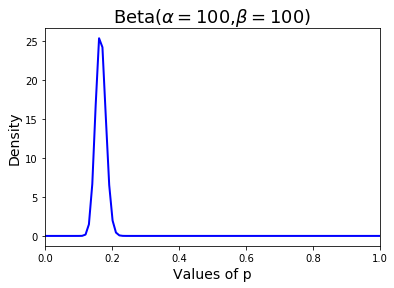

In [38]:
plt.plot(x, beta(a,b).pdf(x),
         'b-', lw = 2)

# Plot customization:
plt.ylabel('Density', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of p', fontsize = 14)
plt.title(r'Beta($\alpha=100$,$\beta=100$)', fontsize = 18);


Take four minutes to explore the Beta distribution. Try to answer some of the following questions:
- As `a` increases, what happens?
- As `b` increases, what happens?
- Under what circumstances will the Beta distribution be symmetric?
- If I wanted a perfectly flat Beta distribution, what values of `a` and `b` would you select?
- If I wanted a Beta distribution that was centered at exactly 50% and had very little variance (almost all of the density is on exactly 50%), what values of `a` and `b` would you select?

### Selecting a likelihood

Our posterior is a combination of our prior and our likelihood (data)!

We want to construct a likelihood function for $\text{data}|p$. We are saying, "For every possible value of $p$, how likely is it that we observe this data?"

The likelihood function should model how the data are generated.

<details><summary>If I flip a fixed number of coins, what distribution should I use to model the number of heads?</summary>
A binomial distribution is probably the best model to use.
</details>

Suppose I flip my coin ten times and observe exactly 8 heads.

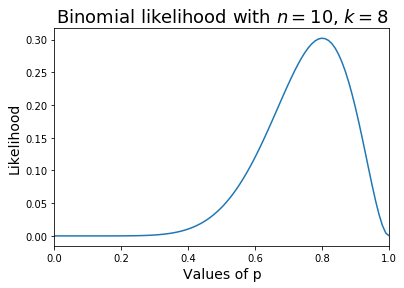

In [40]:
#  Import package.
from scipy.stats import binom

# Define x range.
x = np.linspace(0, 1, 100)

# likelihood_pmfs = [stats.binom(n = total, p = p).pmf(orourke) for p in percentages_for_plotting_x_axes]
# Generate likelihood function.
y = [binom(10, i).pmf(8) for i in x]

# Plot likelihood function.
plt.plot(x,y)

# Plot customization.
plt.ylabel('Likelihood', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of p', fontsize = 14)
plt.title(r'Binomial likelihood with $n=10$, $k=8$', fontsize = 18);

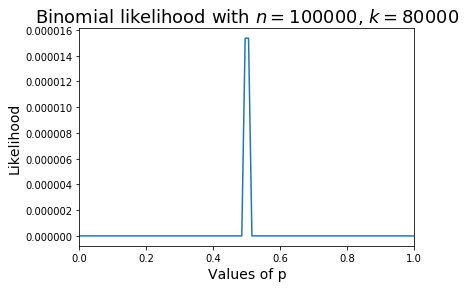

In [42]:
#  Import package.
from scipy.stats import binom

# Define x range.
x = np.linspace(0, 1, 100)

# Generate likelihood function.
y = [binom(n = 100000, p = i).pmf(50000) for i in x]

# Plot likelihood function.
plt.plot(x,y)

# Plot customization.
plt.ylabel('Likelihood', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of p', fontsize = 14)
plt.title(r'Binomial likelihood with $n=100000$, $k=80000$', fontsize = 18);

In [43]:
# binomial distribution is a discrete distribution

Note that my likelihood isn't dependent on my prior. **My likelihood only depends on my data!**

### The Binomial distribution is discrete. Why is my likelihood continuous??
Our likelihood function is showing, "For every possible value of $p$, how likely is it that we observe this data?"

When we talked about the Binomial distribution before, we imagined that the probability of success $p$ was fixed and known. We then looked at how likely it was to observe 8 heads given some fixed value of $p$.

In Bayesian analysis, we've observed the data... now we're trying to learn about $p$! Given the data we've observed, how likely is it that $p$ takes on the value of 0, of 0.01, of 0.02, and so on?

<details><summary>Why do we observe a peak around 0.8 here?</summary>
Because flipped our coin ten times and saw eight heads! It makes sense that the likeliest value for our parameter $p$ is 80%, since we saw heads 80% of the time!</details>

You might say that $p=0.8$ **maximizes our likelihood**... more on this in a later lesson!

Take four minutes to explore the likelihood. Try to answer some of the following questions:
- As `k`, your number of successes, increases, what happens?
- As `n`, your number of trials, increases, what happens?
- Under what circumstances will the likelihood be symmetric?
- Suppose that instead of getting 7 heads out of 10 coins, you got 7000 heads out of 10000 flips. How does this influence your likelihood?

### Simulating our posterior

In [ ]:
## We want to vary p from 0 to 1.

## Set up prior.


## Set up likelihood.


## Calculate posterior based on prior and likelihood.


## Plot prior, likelihood, and posterior.


In [22]:
def plot_beta_binomial(a, b, n_trials, n_successes, n_steps = 100):
    lst = np.linspace(0, 1, n_steps)
    
    ## Calculating prior, likelihood, and posterior.
    prior = [beta(a, b).pdf(i) for i in lst]
    likelihood = [binom(n_trials,i).pmf(k = n_successes) for i in lst]
    posterior = np.multiply(prior, likelihood)
    
    ## Plotting colored lines here to show prior mode, the maximum likelihood value, and posterior mode.
    plt.vlines([(a - 1) / (a + b - 2), n_successes / n_trials, (a + n_successes) / (a + b + n_trials)],
               ymin = 0,
               ymax = max(max(prior),max(likelihood), max(posterior)), # height of dotted lines
               linestyles = 'dashed',
               colors = ['tab:orange', 'tab:green', 'tab:blue'])
    
    ## Plotting prior, likelihood, and posterior.
    plt.title("Prior, Likelihood, and Posterior")
    plt.plot(lst, prior, c = 'tab:orange');
    plt.plot(lst, likelihood, c = 'tab:green');
    plt.plot(lst, posterior, c = 'tab:blue');

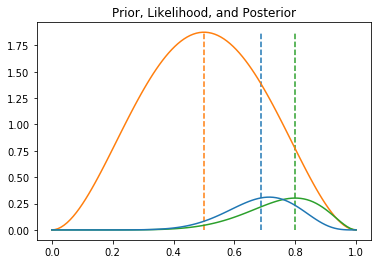

In [23]:
plot_beta_binomial(a =3, b =3, n_trials =10, n_successes =8)

Experiment with this function.
- Pick the vaguest, flattest prior you can! How does this affect our posterior?
- Pick a very, very specific prior that has almost all of its weight on 0.5. How does this affect your posterior?
- Try three or four different values of `a` and `b` in your Beta distribution. How do those influence your prior? Your posterior?
- Suppose that instead of getting 7 heads out of 10 coins, you got 7000 heads out of 10000 flips. How does this influence your likelihood? Your posterior?